# Underfitting - Overfitting Balance

## Preparation of the data set

In [1]:
import pandas as pd
df=pd.read_csv("../content/airline_passenger_satisfaction.csv")
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [2]:
df.shape

(129880, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [7]:
df.dropna(subset=['arrival_delay_in_minutes'], inplace=True)

In [8]:
df.shape

(129487, 23)

In [9]:
df.satisfaction.value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565501
satisfied                  0.434499
Name: proportion, dtype: float64

<Axes: xlabel='satisfaction', ylabel='count'>

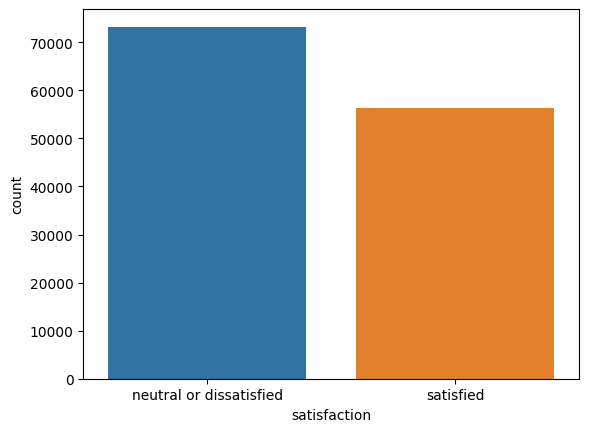

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= "satisfaction",data= df, hue="satisfaction")

## Encoding

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

In [12]:
label_columns = df.select_dtypes(include=['object']).columns
label_columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')

In [13]:
df[label_columns].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()

for col in label_columns:
    df[col] = le.fit_transform(df[col])
    l = list(le.classes_)
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [15]:
df.satisfaction.value_counts(normalize=True)

satisfaction
0    0.565501
1    0.434499
Name: proportion, dtype: float64

**The positive class in scikit-learn is the class that is labeled as class 1.**

## Train/test

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

In [17]:
y_train.value_counts(normalize=True)

satisfaction
0    0.565501
1    0.434499
Name: proportion, dtype: float64

## An overfitted model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
m_01 = DecisionTreeClassifier(random_state=1)
m_01.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

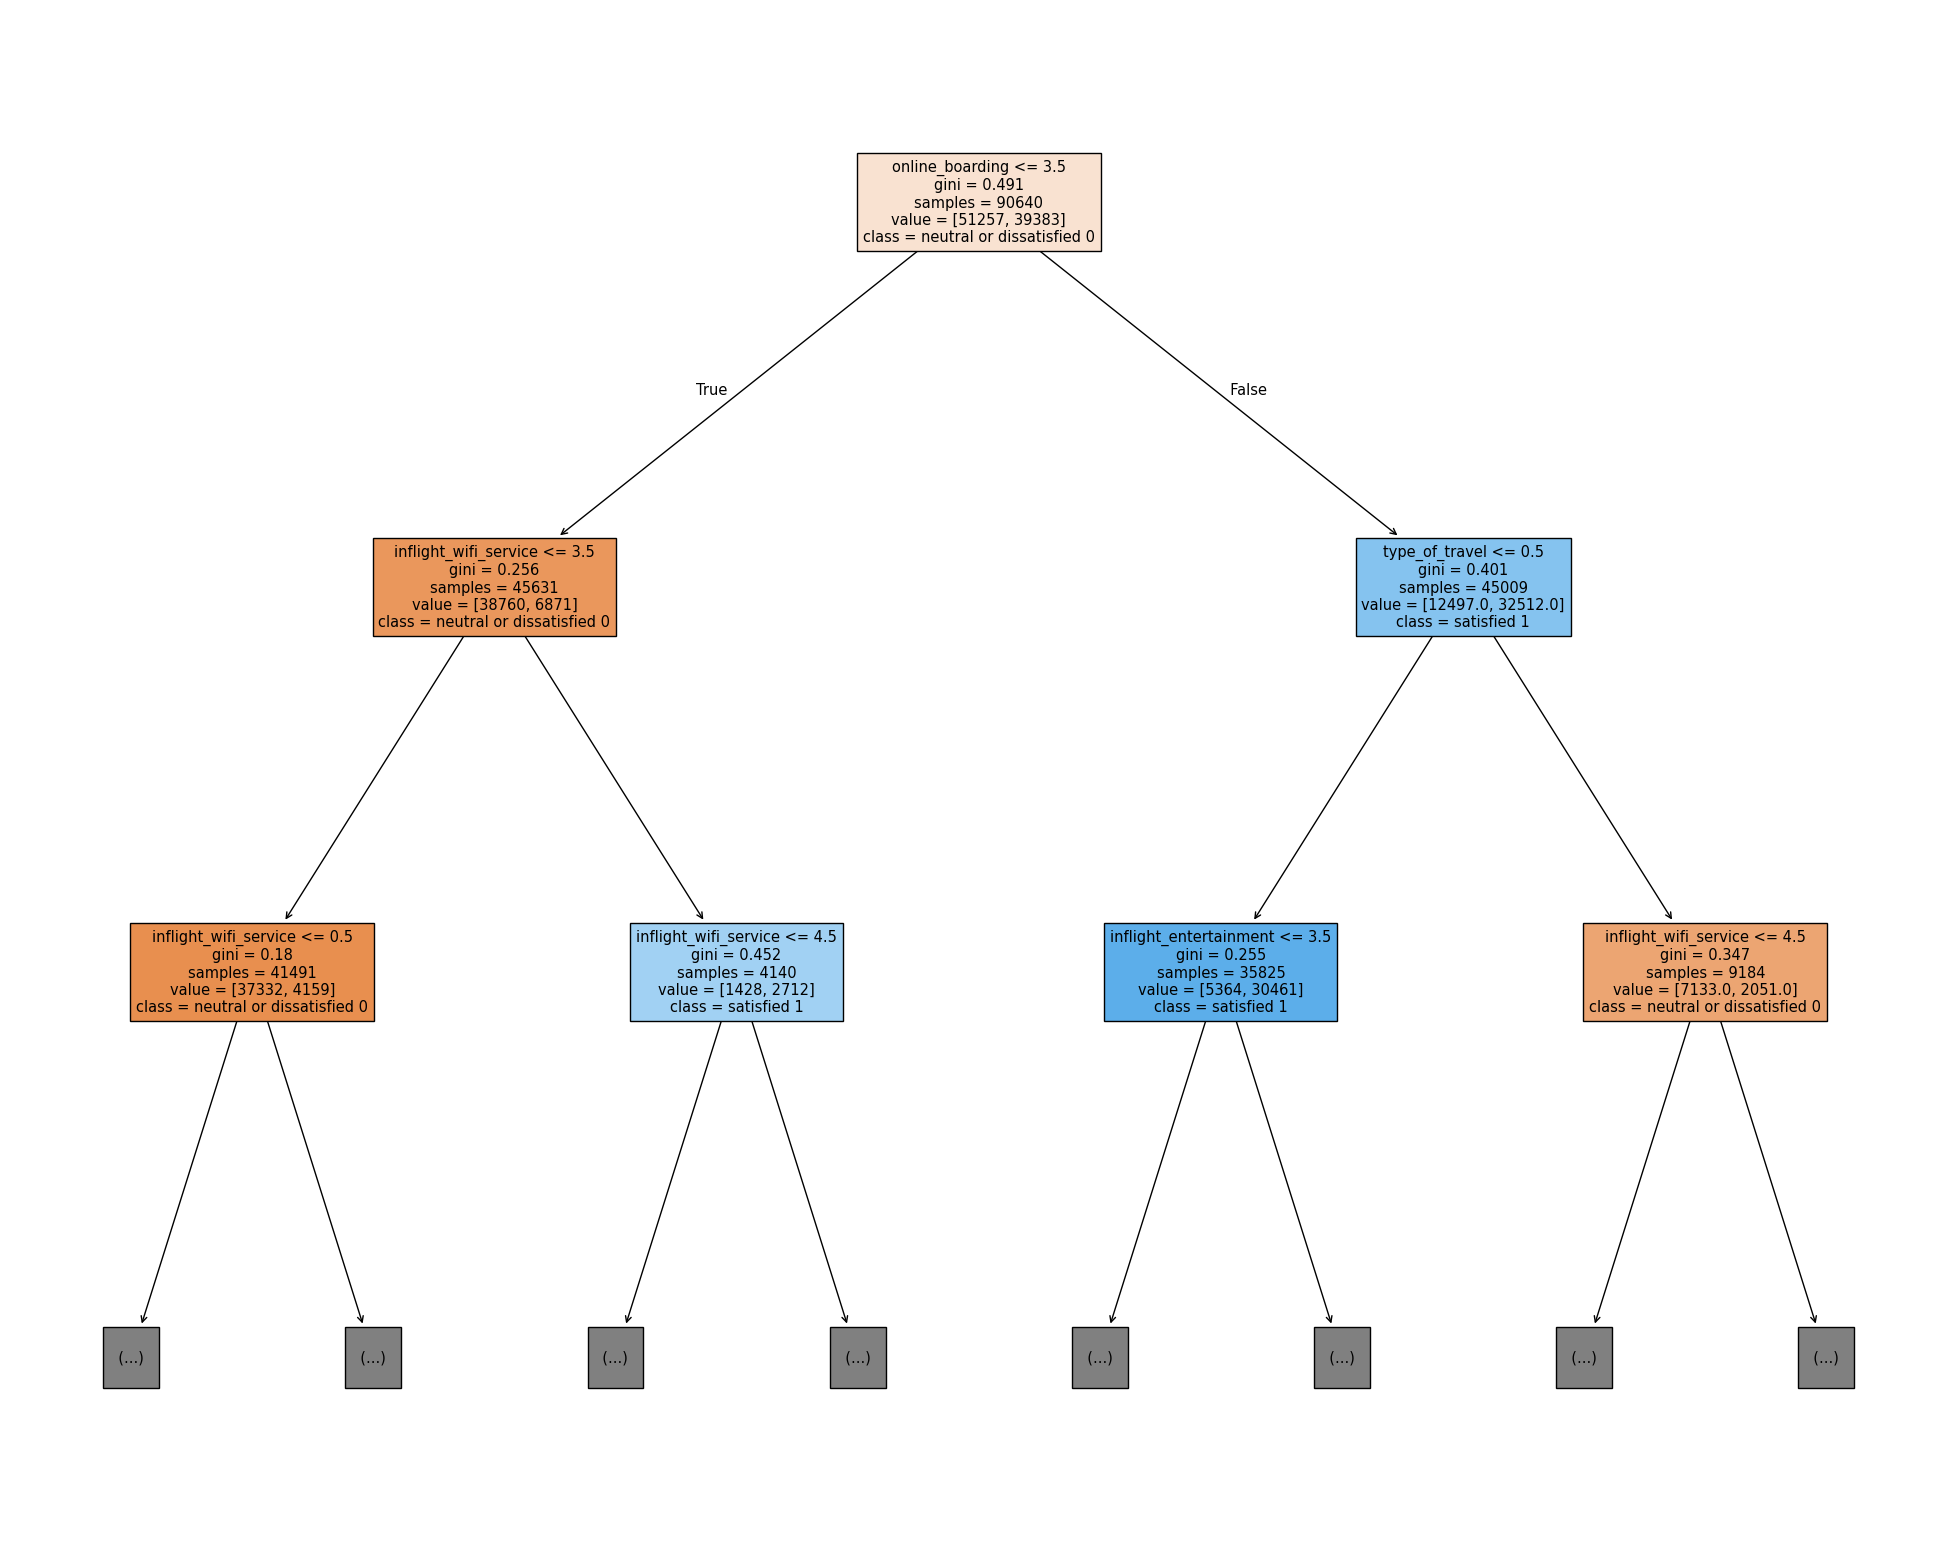

In [20]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m_01,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   max_depth=2,
                   filled=True)

## Prediction

In [21]:
m_01Pred = m_01.predict(X_test)
m_01Pred

array([0, 0, 0, ..., 0, 1, 0], shape=(38847,))

## Evaluation

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, m_01Pred )

array([[20887,  1081],
       [  952, 15927]])

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, m_01Pred ))

Accuracy Score:  0.9476664864725719


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, m_01Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.96      0.95      0.95     21968
      Yes(1)       0.94      0.94      0.94     16879

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



In [25]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, m_01Pred)

np.float64(0.8935995766129229)

### ROC and AUC

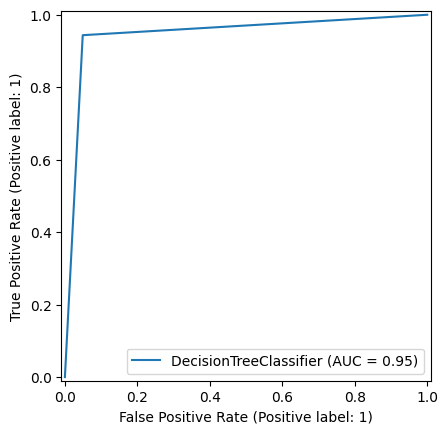

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(m_01, X_test, y_test)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


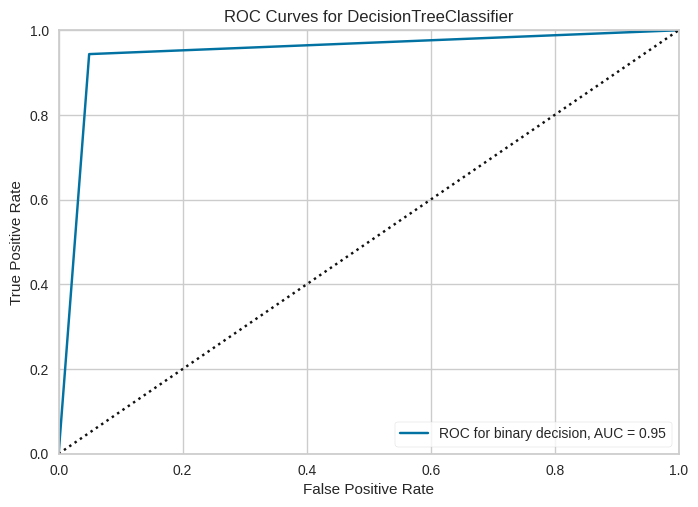

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(m_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

# Diagnosing bias and variance problems with learning curves
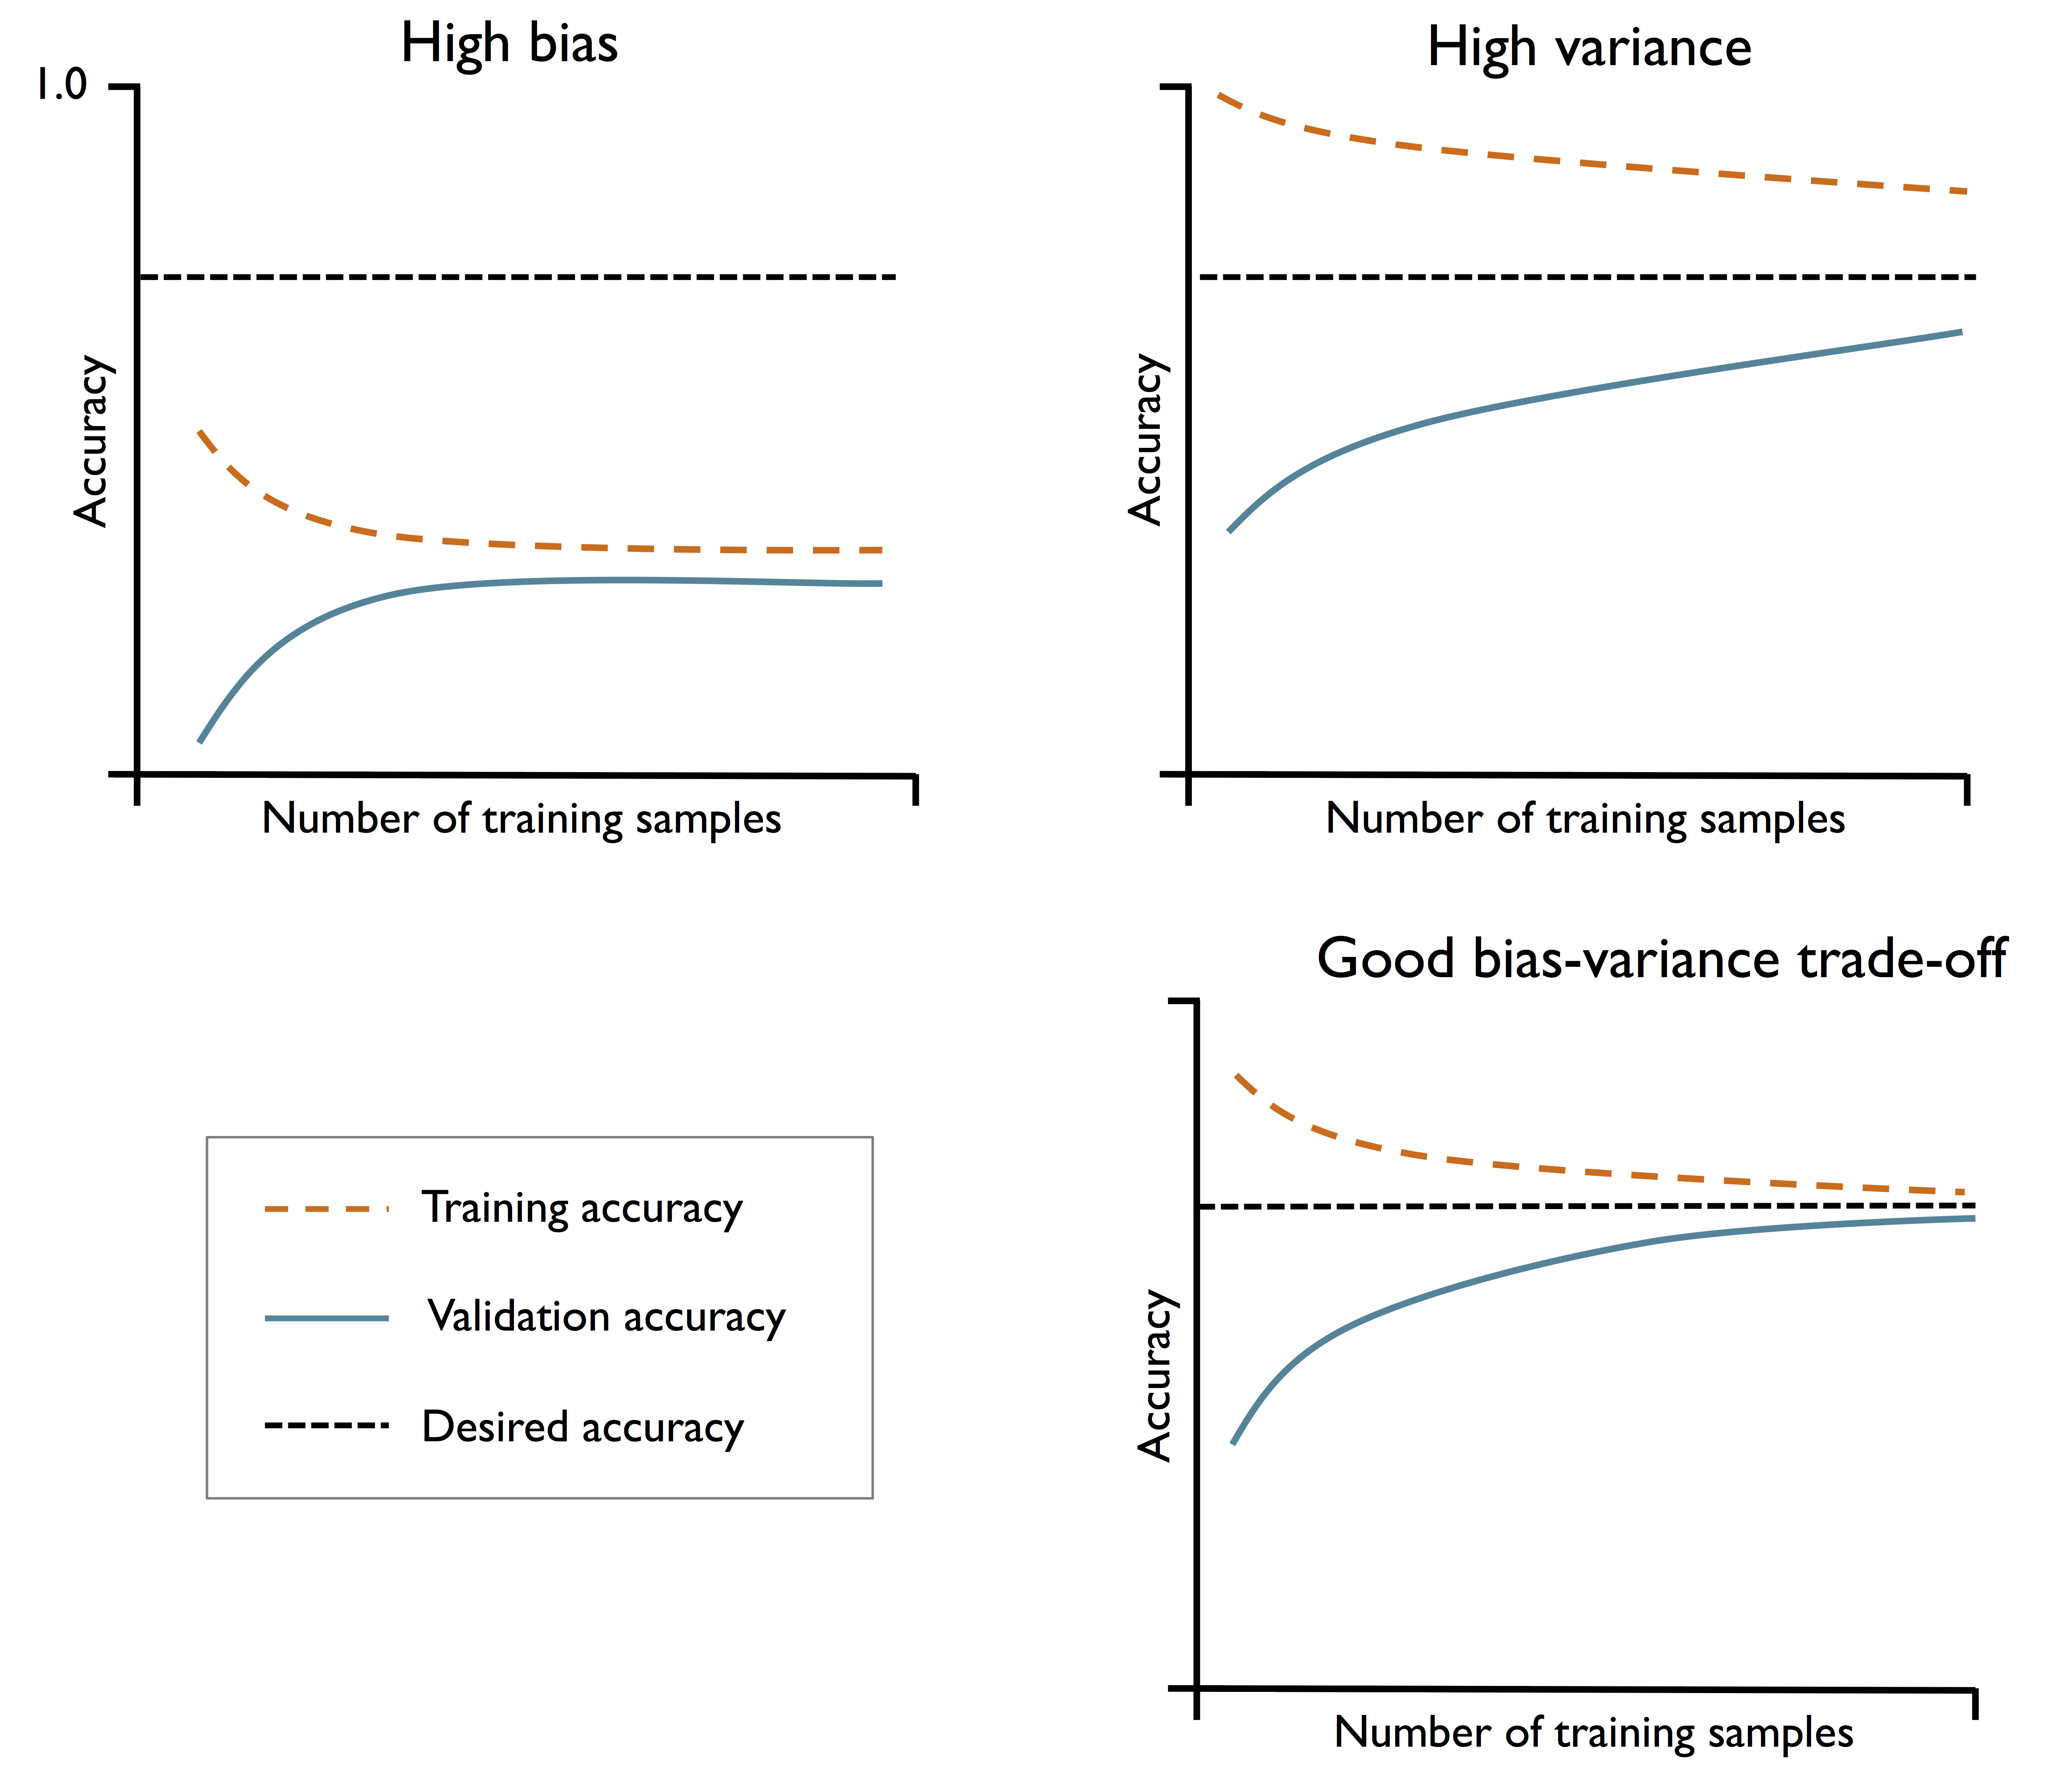

If we set
the n_jobs parameter to 1, only one CPU will be used to evaluate the performances. However, by setting n_jobs=2, we could distribute the 10 rounds
of cross-validation to two CPUs (if available on our machine), and by setting n_jobs=-1, we can use
all available CPUs on our machine to do the computation in parallel.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=m_01,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=10,
                                n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

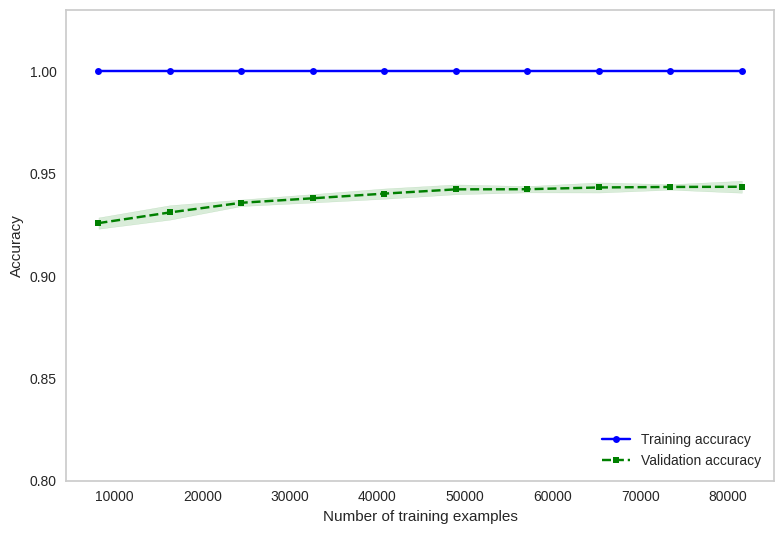

In [29]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

Model with high variance.

## An underfitted model

In [30]:
m_02 = DecisionTreeClassifier(max_depth=1,random_state=1)
m_02.fit(X_train,y_train)
m_02Pred = m_02.predict(X_test)

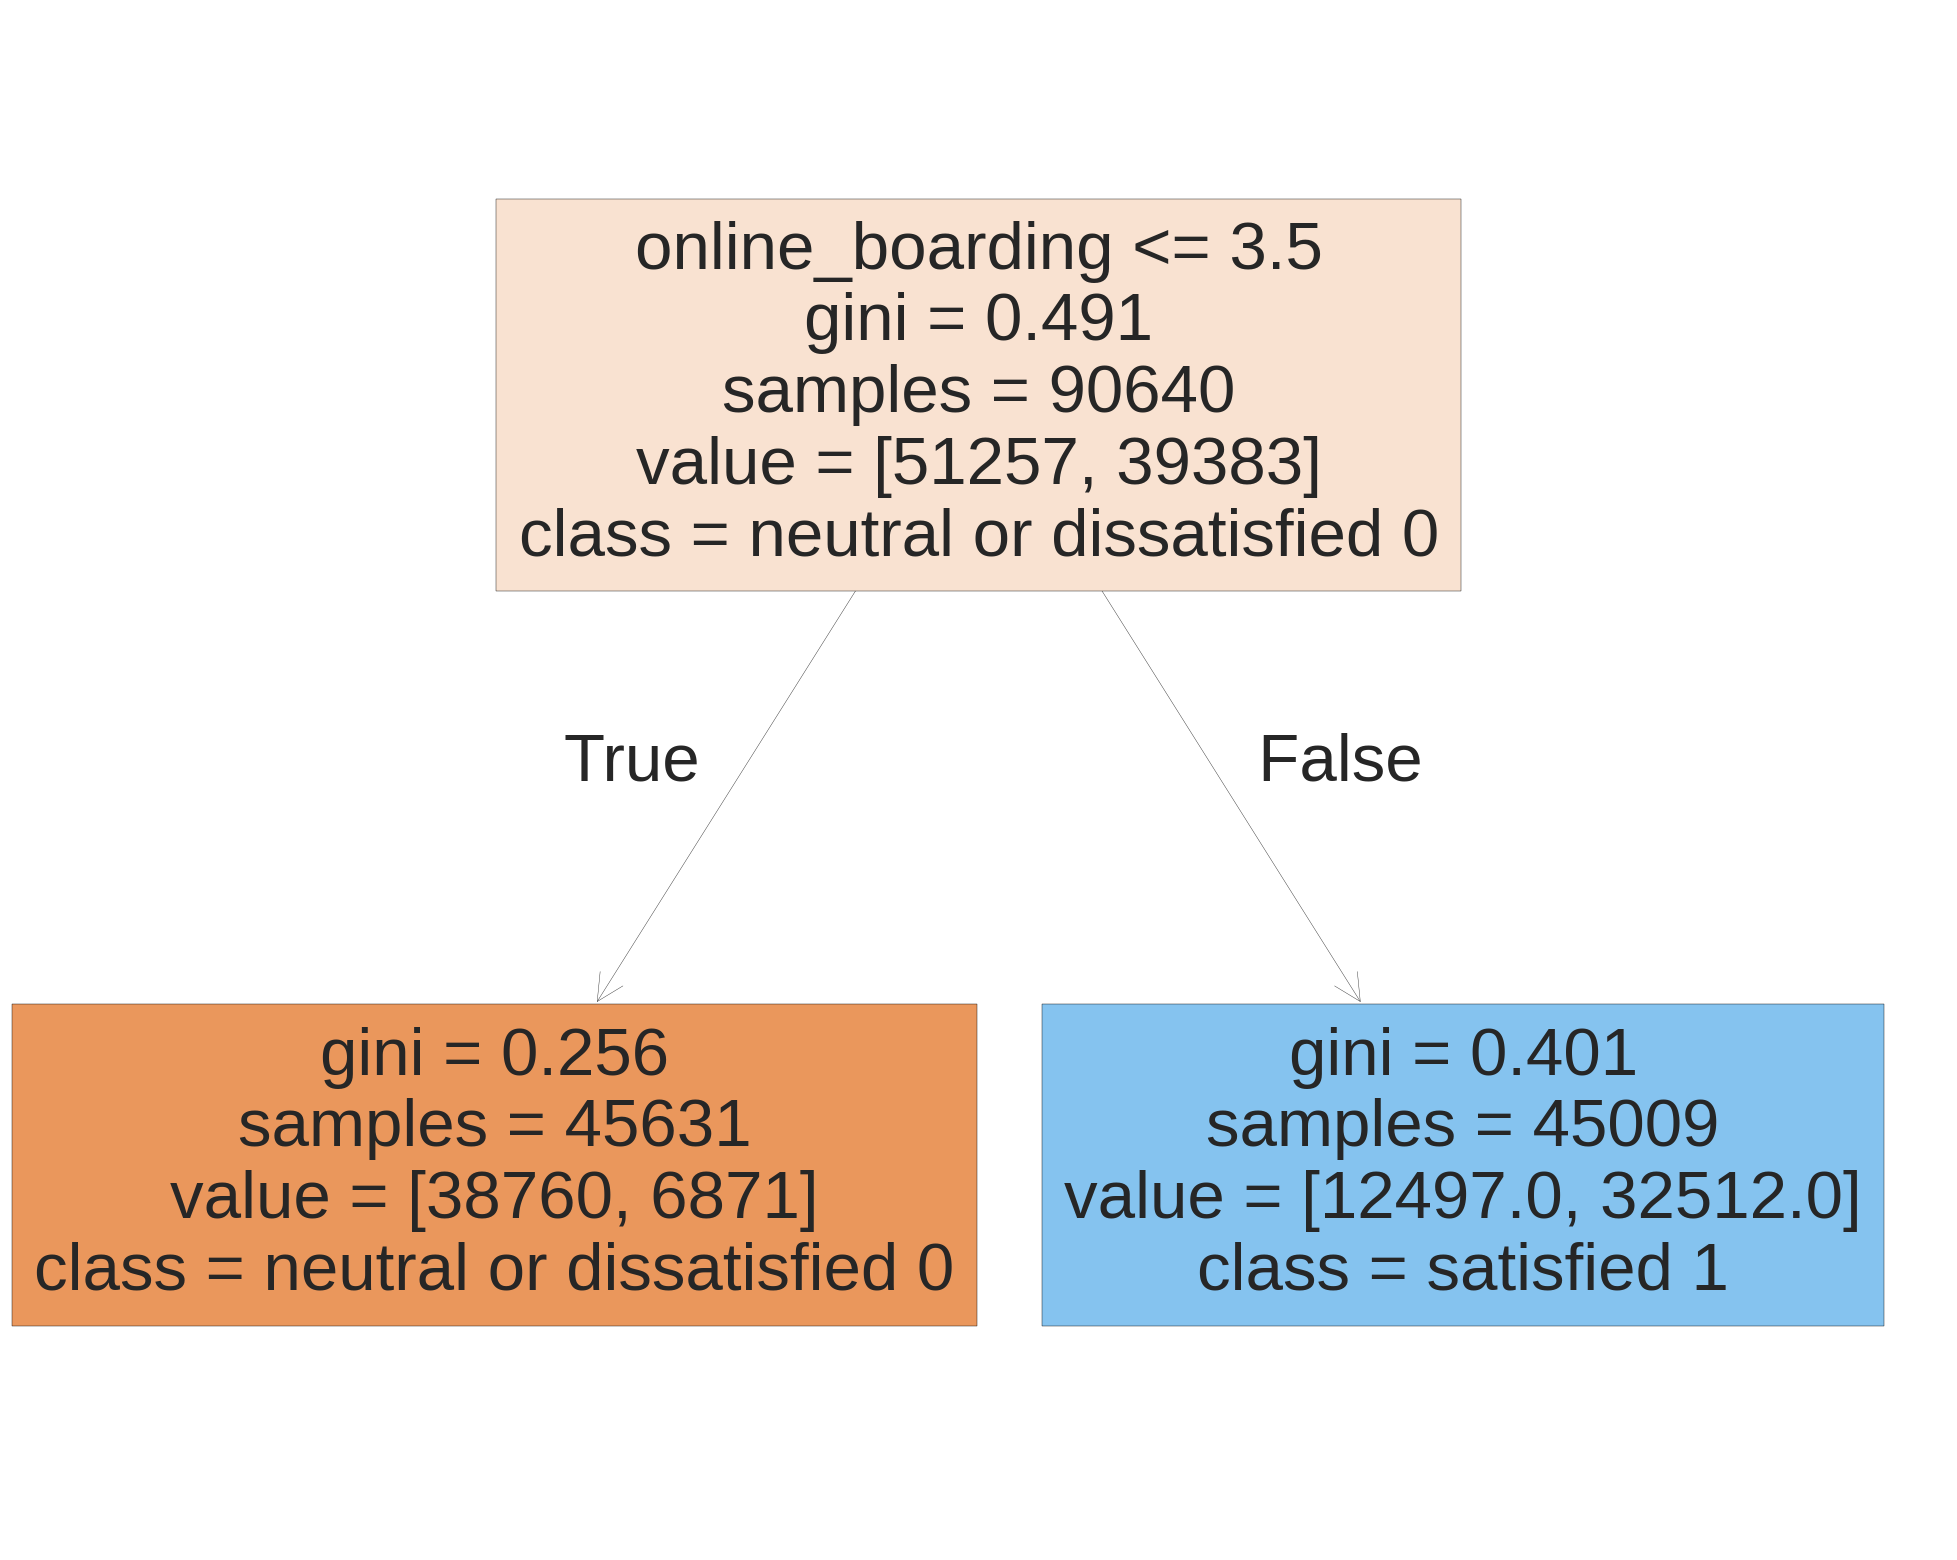

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m_02,
                    feature_names=df.columns,
                    class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                    max_depth=2,
                    filled=True)

In [32]:
confusion_matrix(y_test, m_02Pred )

array([[16648,  5320],
       [ 2914, 13965]])

In [33]:
print('Accuracy Score: ',accuracy_score(y_test, m_02Pred ))

Accuracy Score:  0.7880402605091771


In [34]:
print(classification_report(y_test, m_02Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.85      0.76      0.80     21968
      Yes(1)       0.72      0.83      0.77     16879

    accuracy                           0.79     38847
   macro avg       0.79      0.79      0.79     38847
weighted avg       0.80      0.79      0.79     38847



In [35]:
cohen_kappa_score(y_test, m_02Pred)

np.float64(0.5756841640579805)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


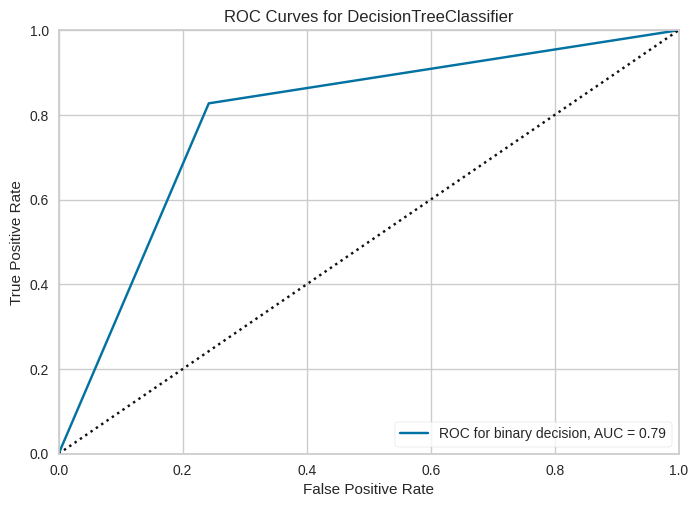

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
vis = ROCAUC(m_02, binary=True)
vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [37]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=m_02,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

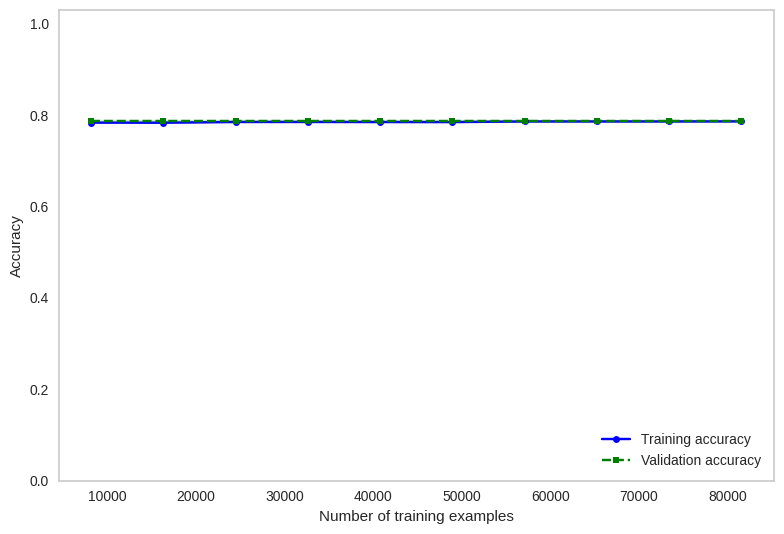

In [38]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(m_02, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:\n', score)
print('Average score:',score.mean())

Scores for each fold are:
 [0.78375993 0.78177405 0.78894528 0.78453222 0.78442189 0.7869594
 0.79181377 0.78795234 0.78574581 0.78729038]
Average score: 0.7863195057369815


## Optimal model

In [40]:
path=m_01.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.00000000e+00, 4.40171803e-06, 5.48480646e-06, ...,
       2.69947495e-02, 6.34005780e-02, 1.63451032e-01], shape=(1589,))

In [41]:
len(alphas)

1589

In [42]:
range(0, len(alphas), 100)

range(0, 1589, 100)

In [43]:
# Working with less values
new_alphas=alphas[0:1551:100]
len(new_alphas)

16

In [44]:
acc_train,acc_test=[],[]

for i in new_alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy_score(y_test,y_test_pred_t))

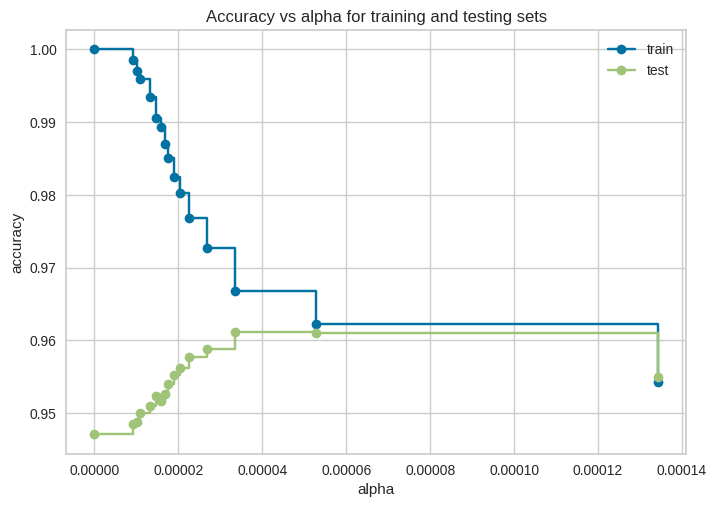

In [45]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(new_alphas, acc_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(new_alphas, acc_test, marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

In [46]:
best_alpha=0.00006

In [47]:
from sklearn.tree import DecisionTreeClassifier
best=DecisionTreeClassifier(ccp_alpha=best_alpha)
best.fit(X_train,y_train)
y_test_pred_best=best.predict(X_test)

In [48]:
best.get_params()

{'ccp_alpha': 6e-05,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

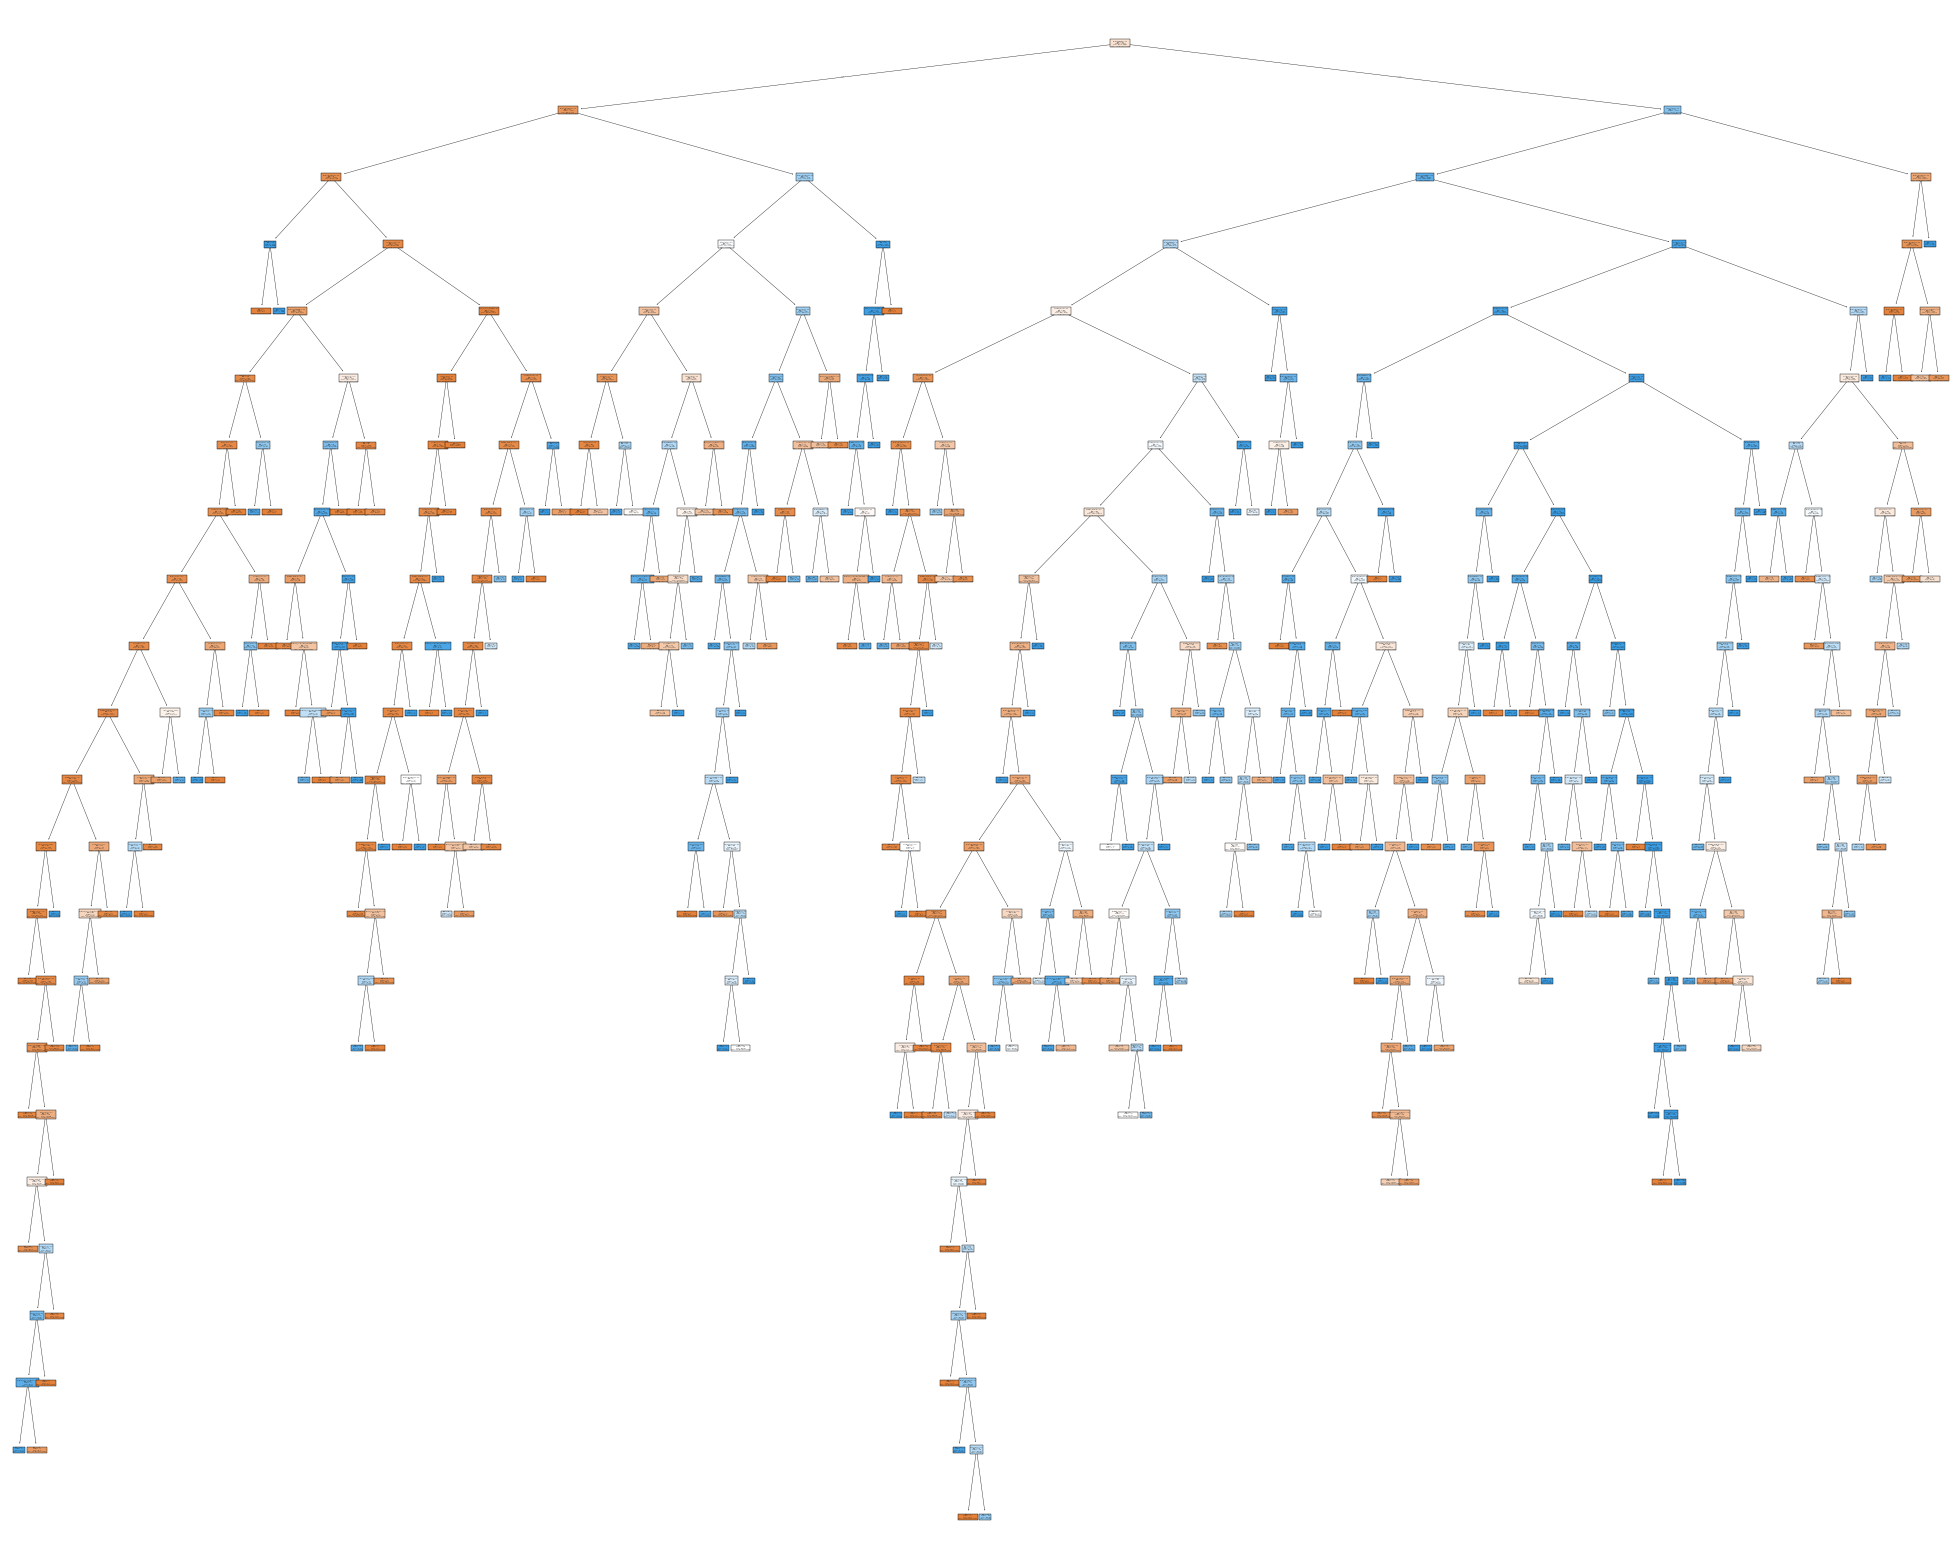

In [49]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best,
                   feature_names=df.columns,
                   class_names = ['neutral or dissatisfied 0', 'satisfied 1'],
                   filled=True)

In [50]:
print('Accuracy Score: ',accuracy_score(y_test, y_test_pred_best))
confusion_matrix(y_test, y_test_pred_best)

Accuracy Score:  0.960074136998996


array([[21480,   488],
       [ 1063, 15816]])

In [51]:
print(classification_report(y_test, y_test_pred_best, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.95      0.98      0.97     21968
      Yes(1)       0.97      0.94      0.95     16879

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [52]:
cohen_kappa_score(y_test, y_test_pred_best)

np.float64(0.9184321386332892)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


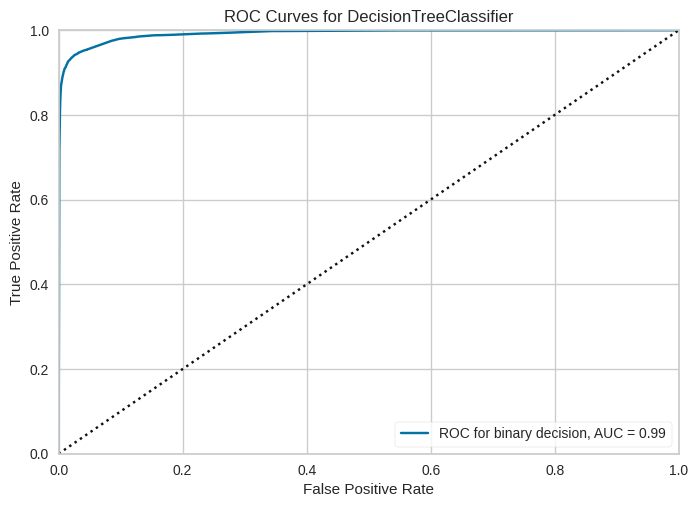

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
vis = ROCAUC(best, binary=True)
vis.fit(X_train, y_train)
vis.score(X_test, y_test)
vis.show()

In [54]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

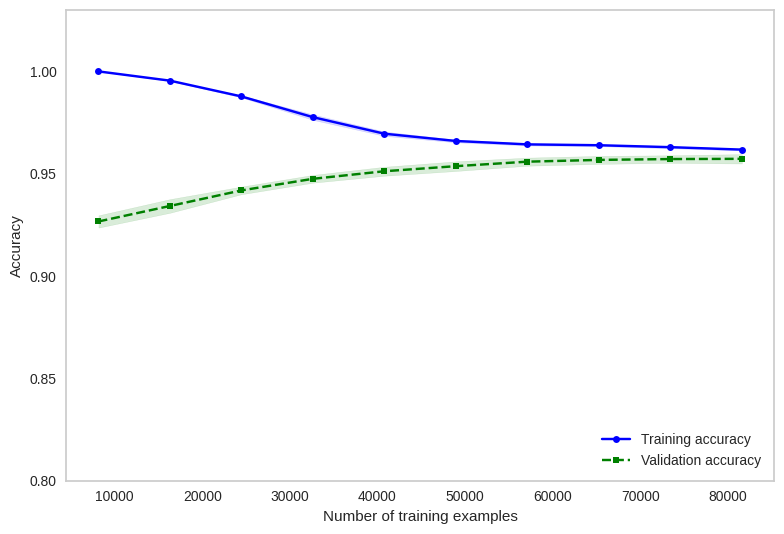

In [55]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# Validation curves
Validation curvesare a useful tool for improving the performance of a model by addressing issues such
as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting
the training and test accuracies as functions of the sample size, we vary the values of the model parameters

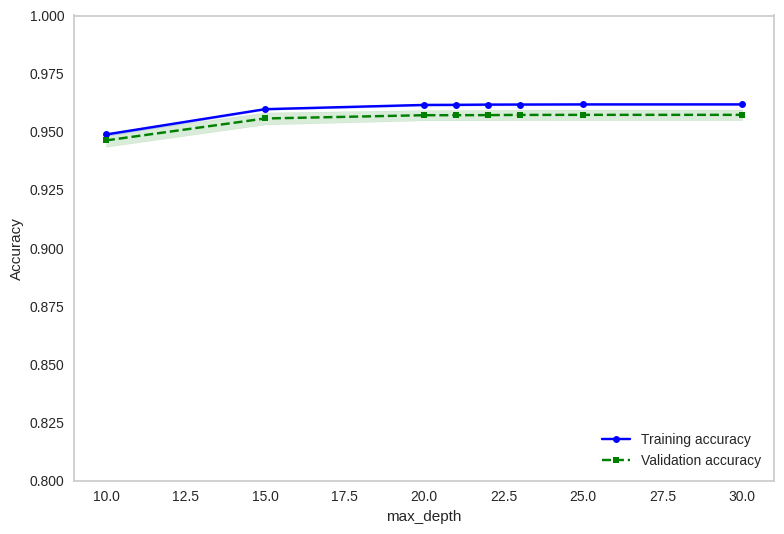

In [56]:
from sklearn.model_selection import validation_curve


param_range = [10,15,20,21,22,23,25,30]
train_scores, test_scores = validation_curve(
                estimator=best,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier
m_03=DecisionTreeClassifier(max_depth=15)
m_03.fit(X_train,y_train)
m_03Pred=m_03.predict(X_test)

In [58]:
confusion_matrix(y_test, m_03Pred )

array([[21179,   789],
       [ 1094, 15785]])

In [59]:
print('Accuracy Score: ',accuracy_score(y_test, m_03Pred ))

Accuracy Score:  0.9515277885036167


# Task

Find an optimal decision tree for the set airline_passenger_satisfaction.csv by simplifying the model.
Improve the set.

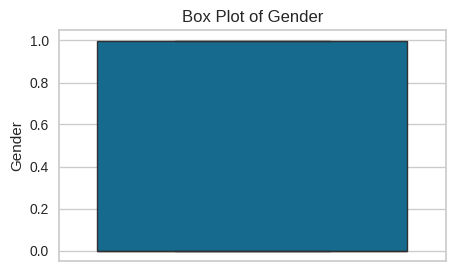

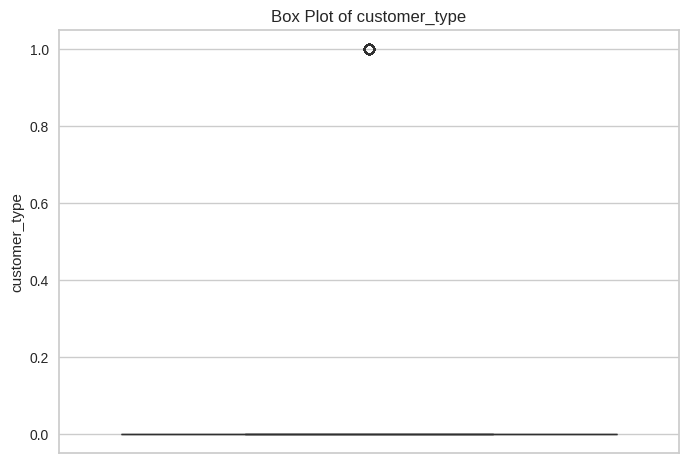

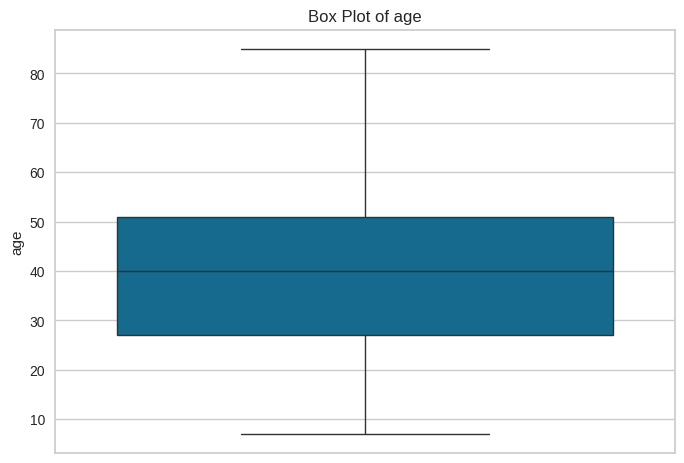

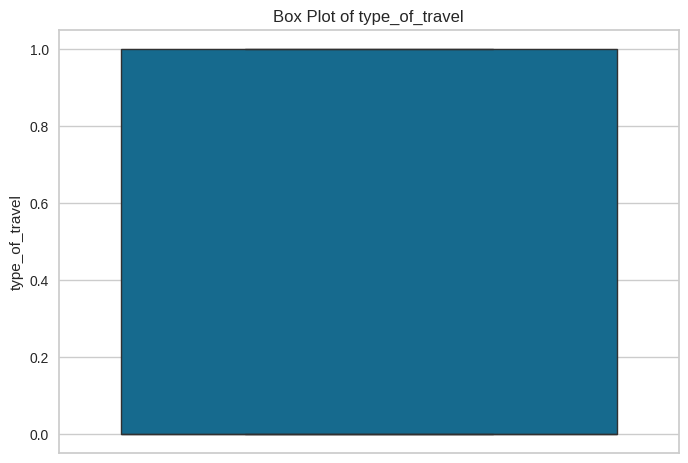

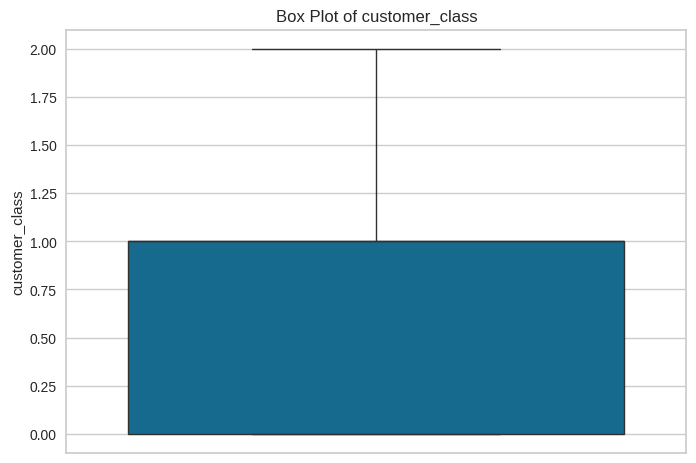

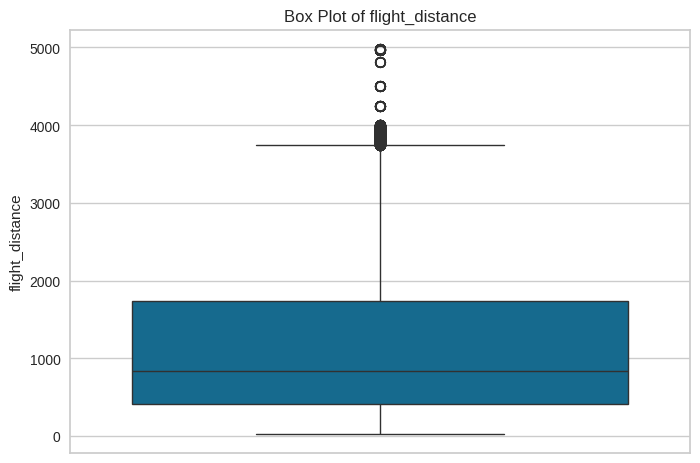

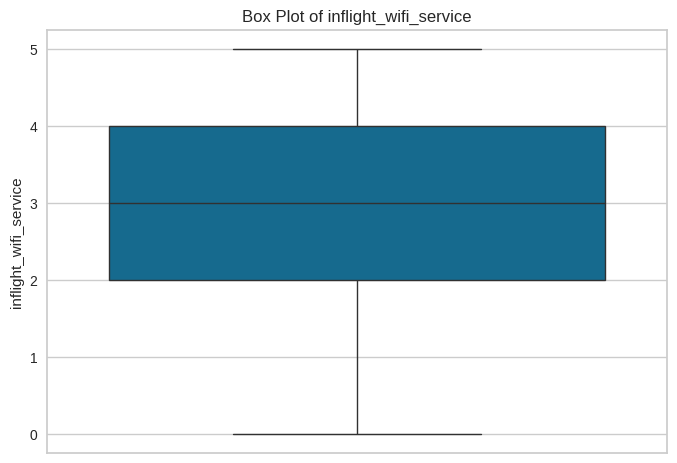

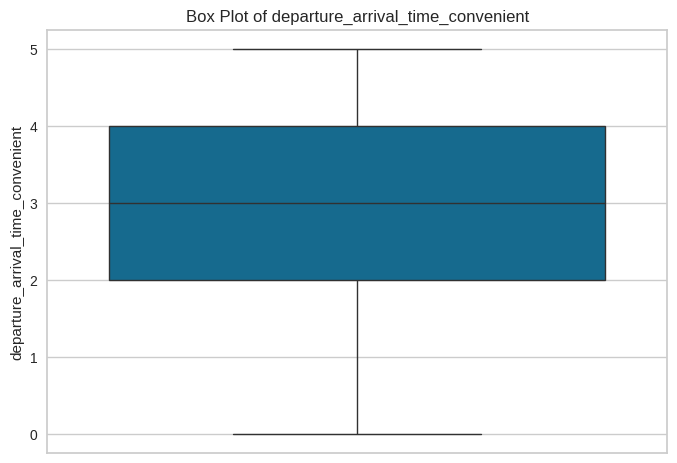

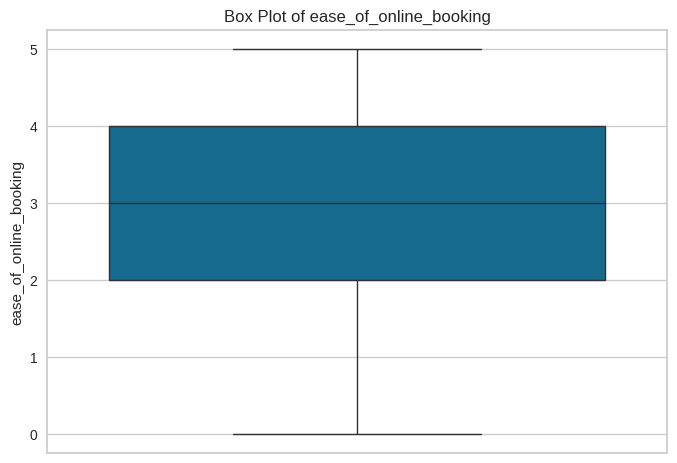

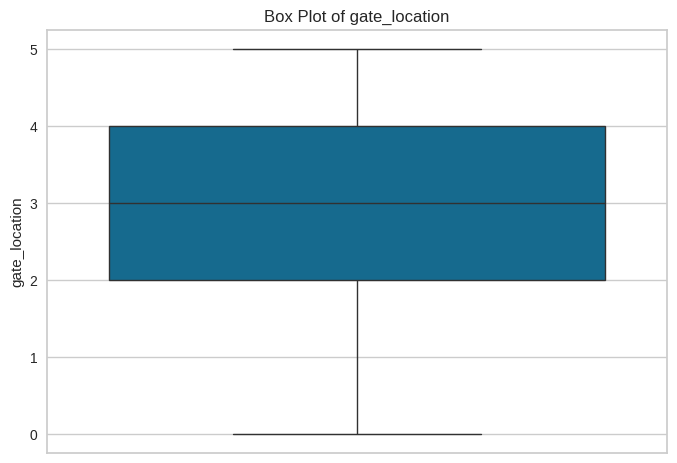

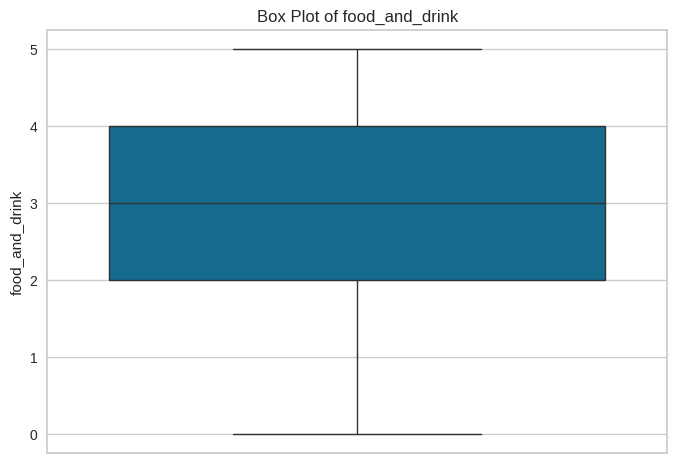

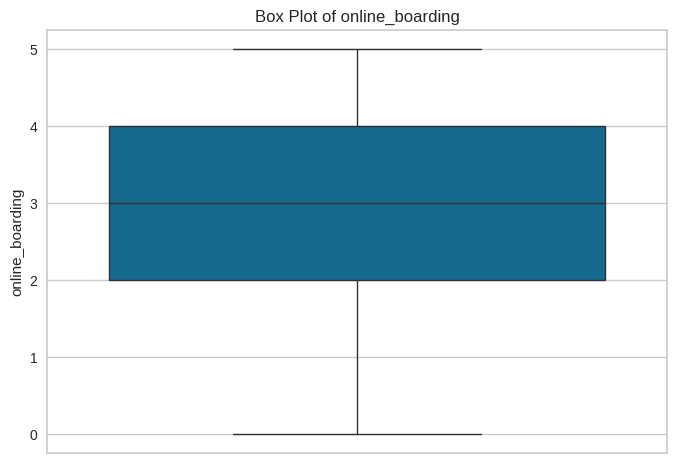

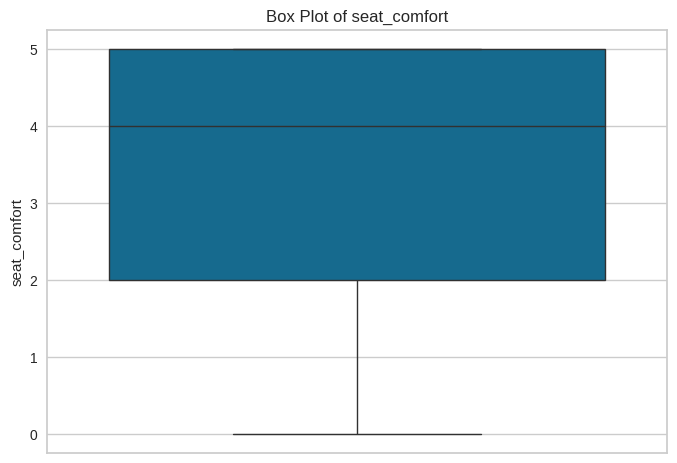

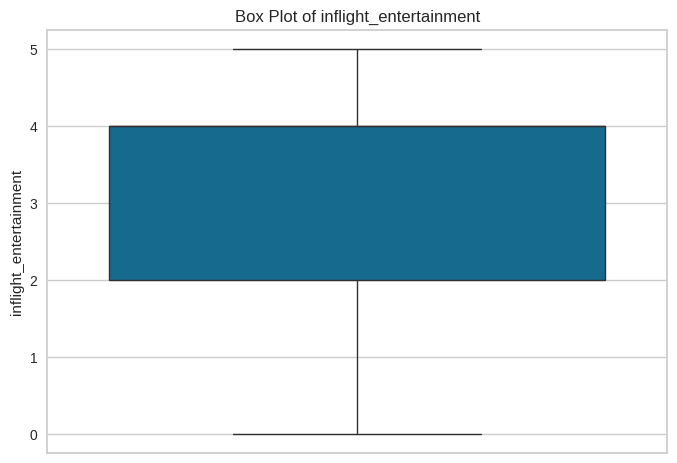

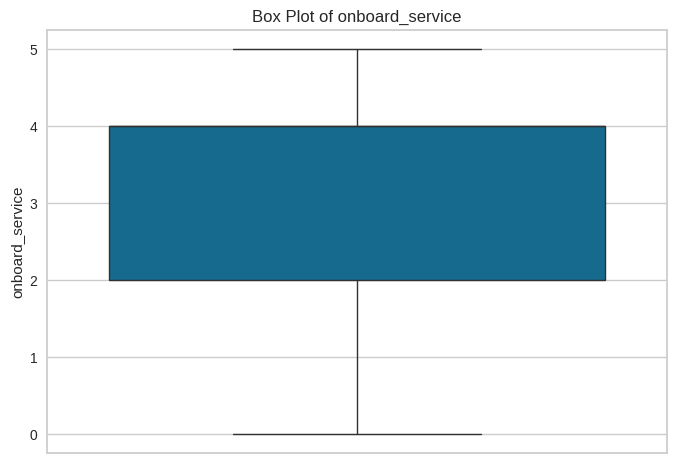

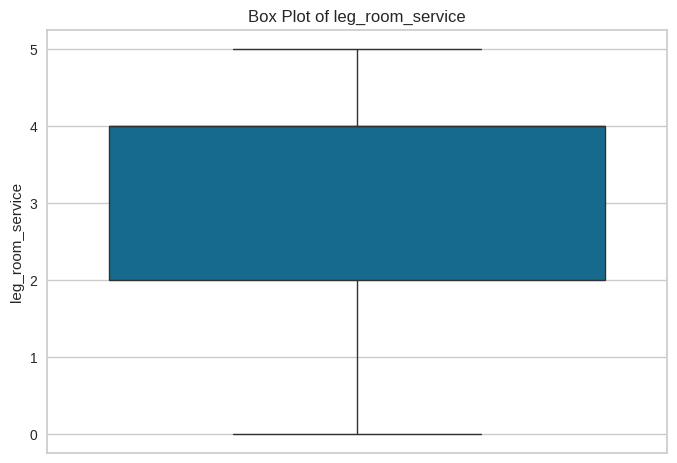

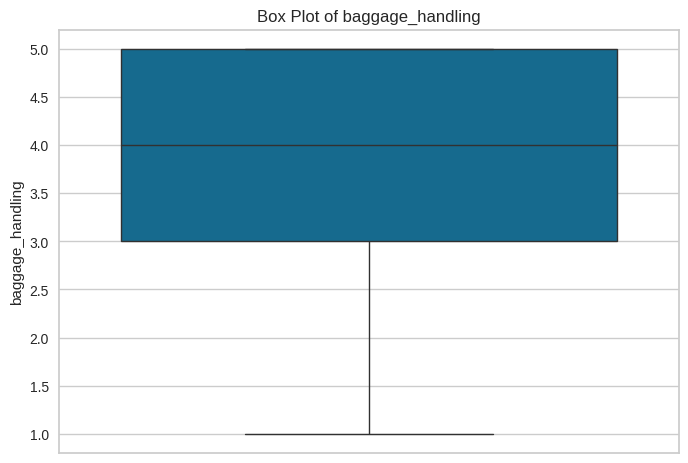

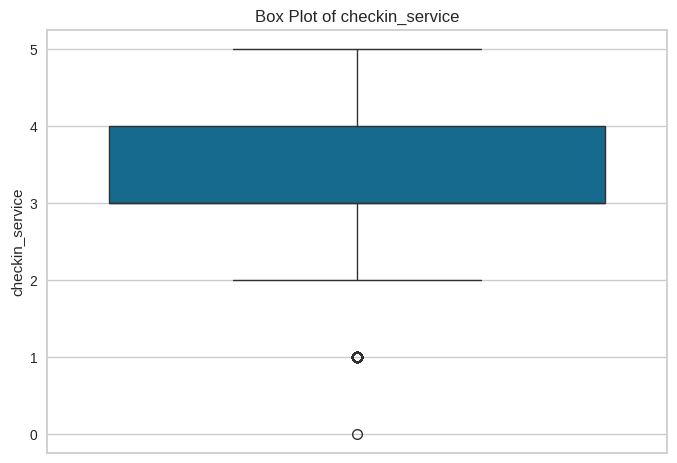

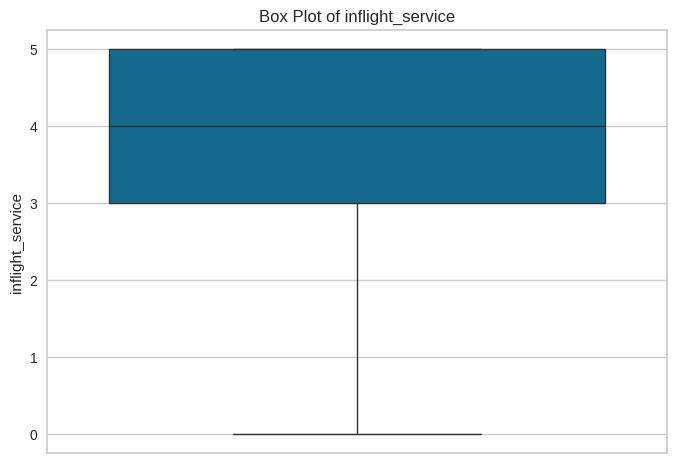

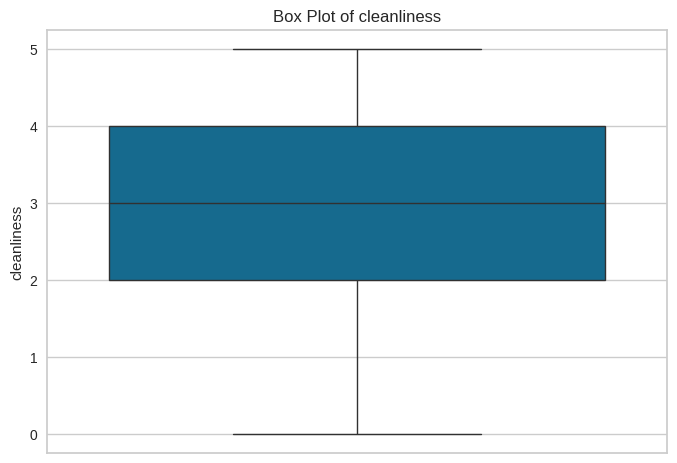

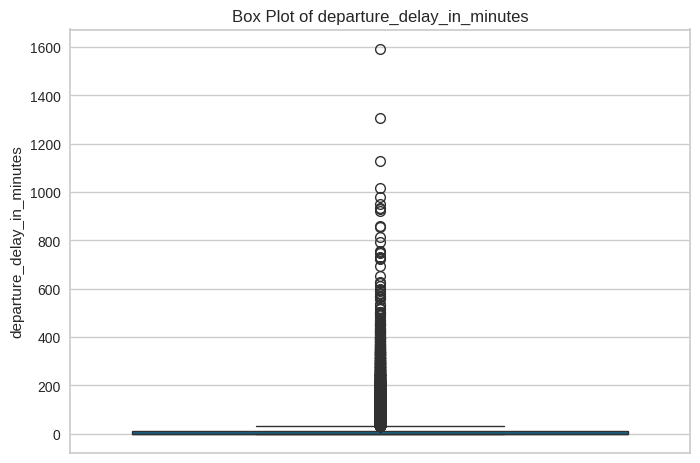

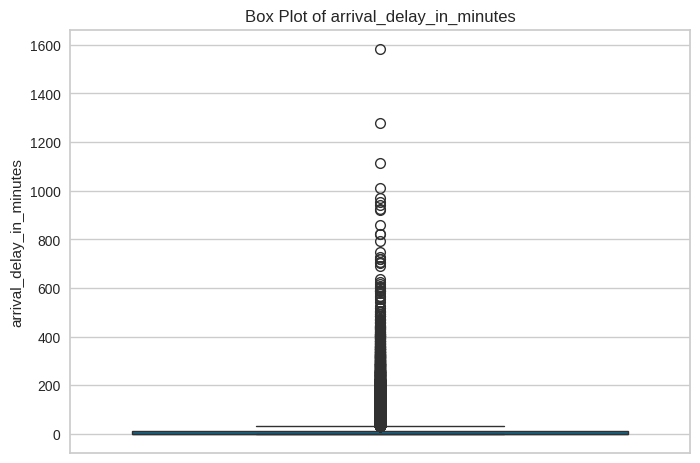

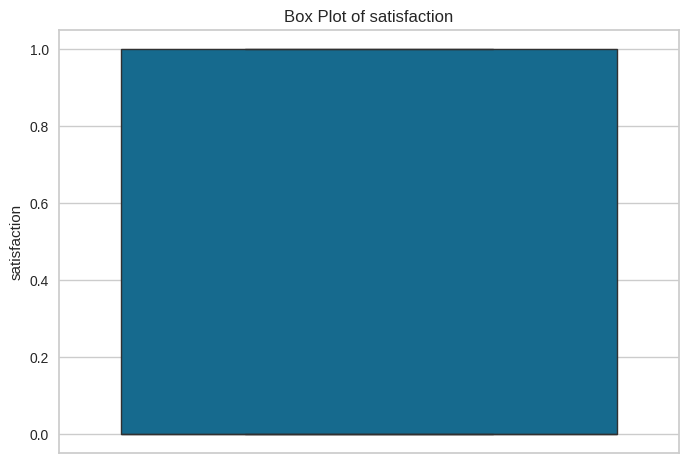

Text(0.5, 1.0, 'Data correlations')

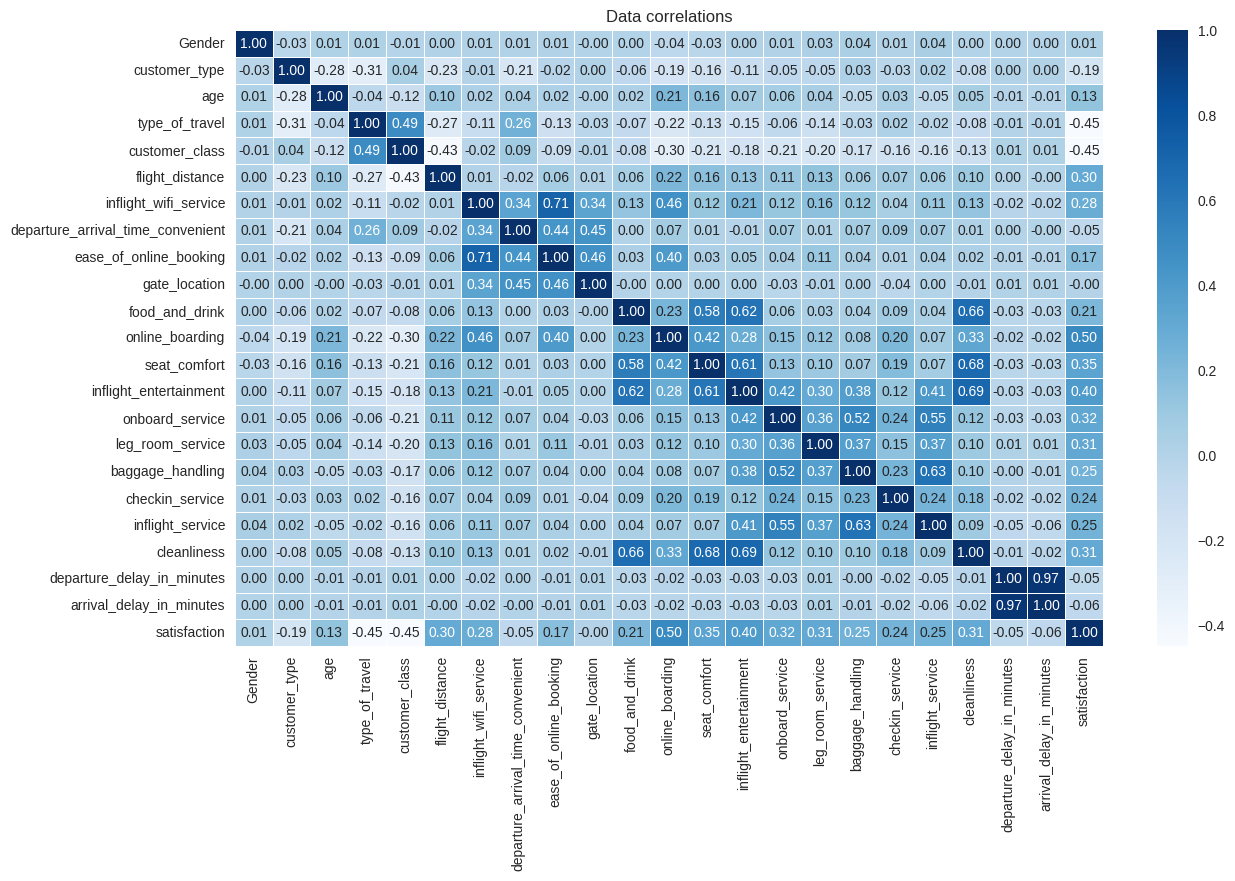

In [60]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Set the figure size
plt.figure(figsize=(5, 3))

# Loop through numeric columns and create box plots
for col in numeric_columns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

correlation=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

1. remove observations with outliers.

In [61]:
outliers = set()
import numpy as np

for cols in df.select_dtypes(include=['number']).columns:

    data = df[cols]

    q1 = np.nanquantile(data,0.25)
    q3 = np.nanquantile(data,0.75)

    q_1 = data.quantile(0.25)
    q_3 = data.quantile(0.75)

    iqr = q3-q1
    upper_lim = q3+(1.5*iqr)
    lower_lim = q1-(1.5*iqr)
    #print(upper_lim)
    #print(lower_lim)

    #print(data[(data > upper_lim) | (data < lower_lim)].index)
    outliers.update(data[(data > upper_lim) | (data < lower_lim)].index)

#print(len(outliers))
#print(outliers)

df.drop(outliers,inplace=True)
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129872,1,0,41,0,1,692,2,2,2,2,...,2,2,3,3,2,3,2,15,3.0,0
129873,1,0,52,0,0,280,3,3,3,3,...,4,4,4,4,3,4,3,0,0.0,1
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0


Text(0.5, 1.0, 'Data correlations')

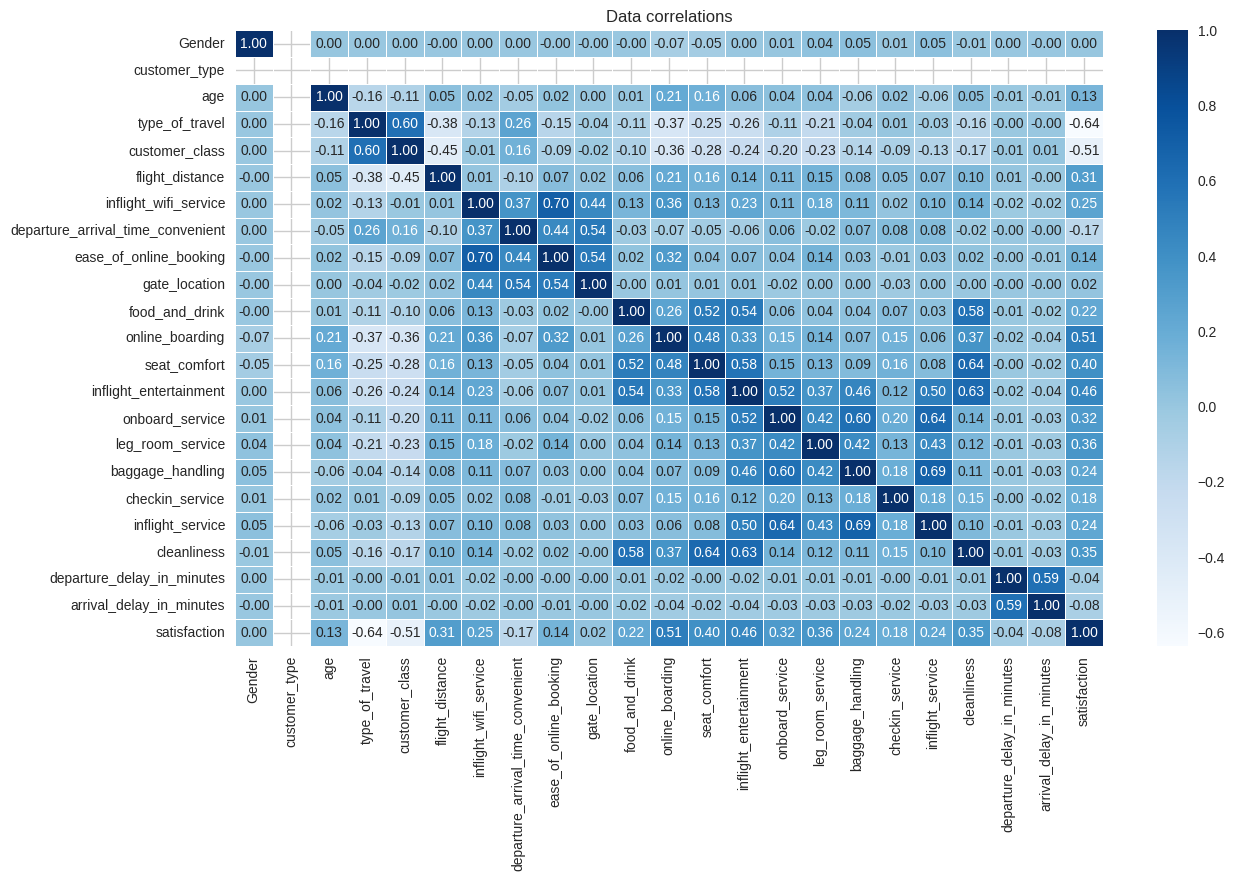

In [62]:
correlation=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

2. remove variables with zero correlation with the variable: satisfaction

In [63]:
zero_correlations = set()
threshold = 0.01

corr_matrix= df.corr()
corr_satisfaction=corr_matrix['satisfaction']

zero_correlations.update(corr_satisfaction[corr_satisfaction.abs() < threshold].index)

zero_correlations
df.drop(zero_correlations,axis=1,inplace=True)
df

,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,13,1,2,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18.0,0
2,0,26,0,0,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,1
4,0,61,0,0,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,1
5,0,26,1,1,1180,3,4,2,1,1,...,1,3,4,4,4,4,1,0,0.0,0
6,0,47,1,1,1276,2,4,2,3,2,...,2,3,3,4,3,5,2,9,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129872,0,41,0,1,692,2,2,2,2,2,...,2,2,3,3,2,3,2,15,3.0,0
129873,0,52,0,0,280,3,3,3,3,3,...,4,4,4,4,3,4,3,0,0.0,1
129876,0,23,0,0,646,4,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,17,1,1,828,2,5,1,5,2,...,2,4,3,4,5,4,2,0,0.0,0
